## Approximate $\pi$ using the Monte Carlo method

The general idea is to use the ratio of the area of a square to a circle  to calcualte $\pi$. Imagine a square of unit area $A_s=1$ and a circle with unit diameter whos area is given by

$$A_c=\frac{\pi d^2}{4}$$

Since the diameter is $d=1$ that equation simply reduces to 
$$A_c=\frac{\pi}{4}$$

The ratio between the areas of the square and the circe is then
$$R_{sc}=\frac{A_s}{A_c}=\frac{1}{\pi/4}=\frac{4}{\pi}$$

If we knew the value of the ratio $R_{sc}$ (which we don't write now) then we could simply evaluate it to find the value of $\pi$ such that

$$\pi=\frac{4}{R_{sc}}$$

Easy! Now how do we find the ratio $R_{sc}$? 

One technique is to throw darts at a board, seriosuly. Well numerically at least.

Simply generate pairs random numbers $(x,y)$ between -0.5 and 0.5 (thee are teh darts) and count how many of them fall inside the unit circle (the dartboard) vs. how many fall inside the unit square. If we do this enough times (millions of times) the that ratio should approximate the real ratio $R_{sc}$. 

Methods like this one which rely on randomness and probability are called $\textit{Monte Carlo methods}$ in honor of the city in the country of Monaco famous for its casinos.

Ok so let's go, first generate a ton of random points

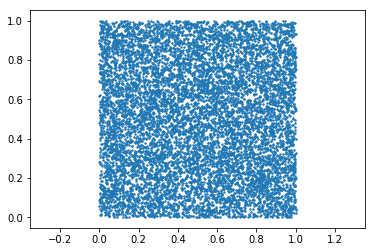

In [92]:
import numpy as np
from numpy.random import rand
from matplotlib import pyplot as plt

#This is how mnay point I want
Npoints=10000

# point in x
x=rand(Npoints)

# point in y
y=rand(Npoints)

#Make a plot to inspect teh results
plt.scatter(x,y,s=2)
plt.axis('equal')
plt.show()

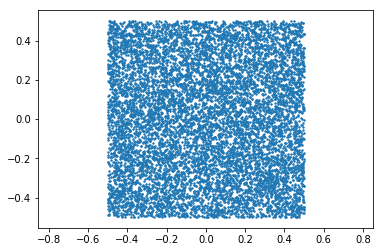

In [93]:
x=x-0.5
y=y-0.5

#plot them again
plt.scatter(x,y,s=2)
plt.axis('equal')
plt.show()

Ok, better, now to better understand why the Monte Carlo method works lets draw a unit circle

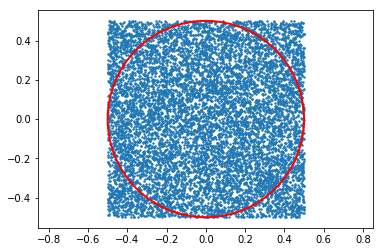

In [94]:
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection


#The points, the same as before
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y,s=2)
plt.axis('equal')

#These next commands draw a circle
x1=0
y1=0
radius=0.5
circle = [plt.Circle((x1, y1), radius)]
p = PatchCollection(circle,facecolor='',edgecolor='r',lw=2)
ax.add_collection(p)

plt.show()

I'll admit that's a complicated set of commands just for drawing a circle, but bear with me, the idea now is to count the number of points that are in the circle. If we treat each (x,y) pair as a set of coordiantes we can measure how far they are from the center of teh circle using Pythagoras' theorem. Let's say for any given point d is the distance from the center

$$d=\sqrt{(x^2+y^2)}$$

we can very easily find the distances for all points

In [95]:
distances=(x**2+y**2)**0.5

Now let's find how many of those distances are smaller than 0.5, those will be the points inside the circle

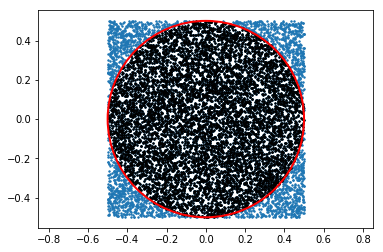

In [96]:
#Where are those points?
points_in_circle=np.where(distances<0.5)[0]

#plot them same as before but this time plot the ones inside the circle a different color
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection


#The points, the same as before
fig=plt.figure()
ax=fig.add_subplot(111)

#plot all points
ax.scatter(x,y,s=2)

#plot just the ones inside the circle and make them black
ax.scatter(x[points_in_circle],y[points_in_circle],c='k',s=2)
plt.axis('equal')

#These next commands draw a circle
x1=0
y1=0
radius=0.5
circle = [plt.Circle((x1, y1), radius)]
p = PatchCollection(circle,facecolor='',edgecolor='r',lw=2)
ax.add_collection(p)

plt.show()

Great, now how many are inside the circle?

In [97]:
N_inside_circle=len(points_in_circle)

print(N_inside_circle)

7826


Now since the total number of points in the square is given by the variable ```Npoints``` that we defined earlier we can easily find the ratio of point in the square to points in the circle

In [98]:
Rsc=Npoints/N_inside_circle

print(Rsc)

1.277791975466394


And finally our estimated value fo pi, which remember is given by:

$$\pi=\frac{4}{R_{sc}}$$

In [99]:
pi=4/Rsc

print(pi)

3.1304000000000003


Not bad! Now let's put the whole thing inside a function and run it with different number of points and see how our approximationg ets better the more darts we throw at the board

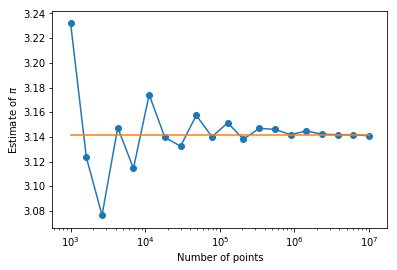

In [100]:
def monte_carlo_pi(Npoints):
    # point in x
    x=rand(int(Npoints))

    # point in y
    y=rand(int(Npoints))
    
    #Subtract 0.5
    x=x-0.5
    y=y-0.5
    
    #Count how mnaya re in the circle
    d=(x**2+y**2)**0.5
    in_circle=np.where(d<0.5)[0]
    N_in_circle=len(in_circle)
    
    #Find pi
    ratio=Npoints/N_in_circle
    pi=4/ratio
    
    return pi


#How mnay different points do you want to try?
Npoints=np.logspace(3,7,20)

#Where am I going to put hte calculation
estimates_of_pi=np.zeros(len(Npoints))

#Loop over all the different numbers of points
for k in range(len(Npoints)):
    estimates_of_pi[k]=monte_carlo_pi(Npoints[k])
    
#Make a plot to see how we do better with more points added
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_xscale('log')
ax.plot(Npoints,estimates_of_pi)
ax.scatter(Npoints,estimates_of_pi)

#What's the real value of pi?
ax.plot(Npoints,3.141592654*np.ones(len(Npoints)))

#Some labels
ax.set_xlabel('Number of points')
ax.set_ylabel(r'Estimate of $\pi$')

plt.show()


As you can see it gets better and better as you add more iterations. How close are we to $\pi$ after 1 billion iterations?

In [101]:
print(estimates_of_pi[-1])

3.1410724


Not very close it turns out, only 3 or 4 decimal places depedning on the luck of the draw. So while cute, this is a very inefficient method of calculating pi!